# demo02_bike.ipynb   共享单车数据分析与预测

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.utils as su
import sklearn.linear_model as lm
import sklearn.tree as st
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.metrics as sm
import sklearn.pipeline as pl

In [15]:
data = pd.read_csv('../data/bike_hour.csv')
data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


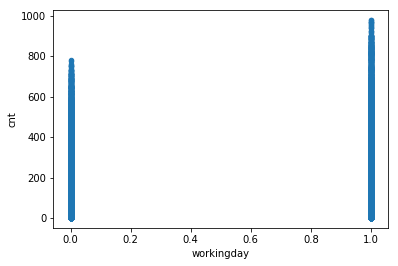

In [16]:
data.plot.scatter(x='workingday', y='cnt')

In [17]:
x = data.loc[:, :'windspeed']
y = data['cnt']
x, y = su.shuffle(x, y, random_state=7)
train_size = int(len(x)*0.9)
train_x, test_x, train_y, test_y = \
    x[:train_size], x[train_size:], y[:train_size], y[train_size:]

In [18]:
# 2. 针对训练集  训练岭回归模型，  针对测试集  验证模型
C = np.arange(0, 1000, 10)
for c in C:
    model = lm.Ridge(c)
    model.fit(train_x, train_y)
    pred_test_y = model.predict(test_x)
#     print(sm.r2_score(test_y, pred_test_y))
model = lm.Ridge(alpha=0)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))

0.38153863606536564


In [19]:
# 训练多项式回归模型
model = pl.make_pipeline(
    sp.PolynomialFeatures(1), lm.LinearRegression())
model = pl.make_pipeline(
    sp.PolynomialFeatures(2), lm.Ridge(alpha=1))
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
print(sm.mean_absolute_error(test_y, pred_test_y))

0.5413613487111808
91.42942575961101


1 : 0.309103551832024
2 : 0.428574897573027
3 : 0.5009888616843756
4 : 0.5758593127854819
5 : 0.638803817223394
6 : 0.6961613238524025
7 : 0.7865313774222241
8 : 0.8326933510929909
9 : 0.875123153453563
0.7865215081017223


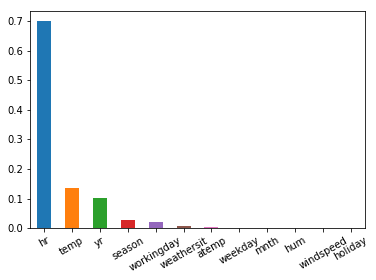

In [20]:
# 训练决策树模型，并测试效果
import sklearn.tree as st
for md in range(1, 10):
    model = st.DecisionTreeRegressor(max_depth=md)
    model.fit(train_x, train_y)
    pred_test_y = model.predict(test_x)
    print(md, ':', sm.r2_score(test_y, pred_test_y))
# 选择5作为最优超参数
model = st.DecisionTreeRegressor(max_depth=7)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
# 输出单颗决策树模型训练后的每个特征的特征重要性
fi = model.feature_importances_
# 通过柱状图绘制特征重要性
fi = pd.Series(fi, index=train_x.columns)
fi.sort_values(ascending=False).plot.bar(rot=30)

0.8779859300977839


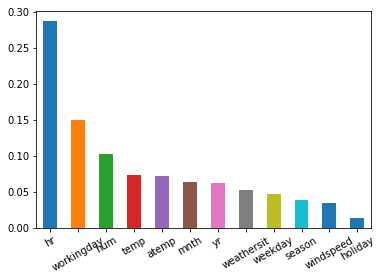

In [24]:
# AdaBoost模型
import sklearn.ensemble as se
model = st.DecisionTreeRegressor(max_depth=7)
model = se.AdaBoostRegressor(model, n_estimators=700, random_state=7)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
# 输出AdaBoost模型训练后的每个特征的特征重要性
fi = model.feature_importances_
# 通过柱状图绘制特征重要性
fi = pd.Series(fi, index=train_x.columns)
fi.sort_values(ascending=False).plot.bar(rot=30)

0.9492624872806351


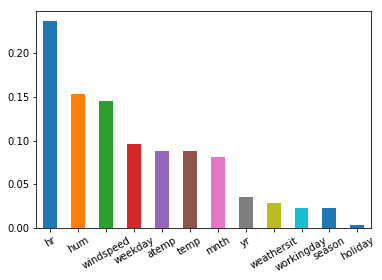

In [22]:
model = se.GradientBoostingRegressor(
    max_depth=9, n_estimators=700, min_samples_split=4)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
# 输出GBDT模型训练后的每个特征的特征重要性
fi = model.feature_importances_
# 通过柱状图绘制特征重要性
fi = pd.Series(fi, index=train_x.columns)
fi.sort_values(ascending=False).plot.bar(rot=30)

In [23]:
# 训练随机森林
depths = [10, 12,13]
estimators = np.arange(50, 60, 50)
splits = [2, 3, 4]
for d in depths:
    for e in estimators:
        for s in splits:
            model = se.RandomForestRegressor(
                max_depth=d, n_estimators=e, min_samples_split=s)
            model.fit(train_x, train_y)
            pred_test_y = model.predict(test_x)
            print(d, e, s, sm.r2_score(test_y, pred_test_y))
            
# # 输出随机森林模型训练后的每个特征的特征重要性
# fi = model.feature_importances_
# # 通过柱状图绘制特征重要性
# fi = pd.Series(fi, index=train_x.columns)
# fi.sort_values(ascending=False).plot.bar(rot=30)

10 50 2 0.9169879806703018
10 50 3 0.9173560220567335
10 50 4 0.9181943998286567
12 50 2 0.9357628673627325
12 50 3 0.9341586647475748
12 50 4 0.9328382945301972
13 50 2 0.9364743397328039
13 50 3 0.9380762760519579
13 50 4 0.9387788277704571
